<a href="https://colab.research.google.com/github/obaniah/Assignment-3-CS-4783-5783---Oday-Bani-Ahmadd/blob/main/Q1_AS_3_ML_CS_5783_ODAY_BANI_AHMAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Question 1]

In [3]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


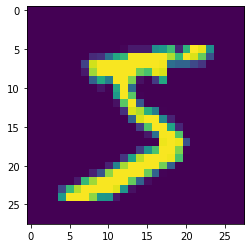

In [4]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [5]:
#check image shape
X_train[0].shape

(28, 28)

In [6]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [7]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Q1- 1. A regular CNN where the number of filters in each layer **increases** as the depth of the 
network grows i.e., the Lth layer will have more filters than the (L-1)th layer. 


---
the best of my trail was the following

*   SGD , Batch size = 32 , epochs = 25 , val_loss: 0.0228 - val_accuracy: 0.9946





In [8]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , MaxPooling2D , Dropout 

#create model
model_inc_f = Sequential()
#add model layers

model_inc_f.add(Conv2D(5, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model_inc_f.add(Conv2D(7, (3, 3), activation='relu'))
model_inc_f.add(Conv2D(8, (3, 3), activation='relu'))
model_inc_f.add(Conv2D(16, (3, 3), activation='relu'))
model_inc_f.add(Conv2D(32, (3, 3), activation='relu'))


model_inc_f.add(MaxPooling2D(pool_size=(2, 2)))
model_inc_f.add(Dropout(0.25))
 
model_inc_f.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_inc_f.add(Conv2D(128, (3, 3), activation='relu'))
model_inc_f.add(Conv2D(256, (3, 3), activation='relu'))

 
model_inc_f.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_inc_f.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))

model_inc_f.add(MaxPooling2D(pool_size=(2, 2)))
model_inc_f.add(Dropout(0.25))
 
model_inc_f.add(Flatten())
model_inc_f.add(Dense(512, activation='relu'))
model_inc_f.add(Dropout(0.5))
model_inc_f.add(Dense(10, activation= 'softmax'))


Using Adam optimizer with epochs = 3 lead to Acc = 0.9876



In [ ]:
#compile model using accuracy to measure model performance
model_inc_f.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model_inc_f.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 45s 18ms/step - loss: 0.2582 - accuracy: 0.9212 - val_loss: 0.0659 - val_accuracy: 0.9802
Epoch 2/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0814 - accuracy: 0.9769 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 3/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0682 - accuracy: 0.9808 - val_loss: 0.0372 - val_accuracy: 0.9876


we can conclude that as we increase the number of epochs that the acuracey enhanced.

Using SGD optimizer with epochs = 5 lead to  Acc 0.9932




In [ ]:
from keras.backend import batch_set_value
#compile model using accuracy to measure model performance
model_inc_f.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_inc_f.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0347 - accuracy: 0.9897 - val_loss: 0.0235 - val_accuracy: 0.9926
Epoch 2/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0274 - accuracy: 0.9920 - val_loss: 0.0225 - val_accuracy: 0.9937
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0223 - accuracy: 0.9932 - val_loss: 0.0194 - val_accuracy: 0.9947
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0211 - val_accuracy: 0.9939
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0249 - val_accuracy: 0.9932


In [9]:
#SGD , Batch size = 32 , epochs = 25 , val_loss: 0.0228 - val_accuracy: 0.9946
from keras.backend import batch_set_value
#compile model using accuracy to measure model performance
model_inc_f.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_inc_f.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25 , batch_size = 32)

Epoch 1/25
1875/1875 [==============================] - 40s 16ms/step - loss: 0.2845 - accuracy: 0.9087 - val_loss: 0.0531 - val_accuracy: 0.9835
Epoch 2/25
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0746 - accuracy: 0.9770 - val_loss: 0.0385 - val_accuracy: 0.9877
Epoch 3/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0311 - val_accuracy: 0.9914
Epoch 4/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0411 - accuracy: 0.9877 - val_loss: 0.0265 - val_accuracy: 0.9921
Epoch 5/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0246 - val_accuracy: 0.9922
Epoch 6/25
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0301 - accuracy: 0.9907 - val_loss: 0.0235 - val_accuracy: 0.9930
Epoch 7/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.0232 -

Using SGD optimizer, lr = 0.01 , epochs = 5  , Batch size = 128  lead to  Acc .9905

In [ ]:
import keras as keras
optimizer = keras.optimizers.SGD(lr=0.01)
model_inc_f.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_inc_f.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5 ,  batch_size= 128)

Epoch 1/5
469/469 [==============================] - 23s 44ms/step - loss: 0.0787 - accuracy: 0.9759 - val_loss: 0.0370 - val_accuracy: 0.9888
Epoch 2/5
469/469 [==============================] - 19s 41ms/step - loss: 0.0636 - accuracy: 0.9807 - val_loss: 0.0334 - val_accuracy: 0.9888
Epoch 3/5
469/469 [==============================] - 19s 41ms/step - loss: 0.0546 - accuracy: 0.9837 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 4/5
469/469 [==============================] - 19s 41ms/step - loss: 0.0484 - accuracy: 0.9852 - val_loss: 0.0320 - val_accuracy: 0.9885
Epoch 5/5
469/469 [==============================] - 19s 40ms/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0275 - val_accuracy: 0.9905


using RMSProp optimizer and epochs = 7 , val_accuracy: 0.9735

In [ ]:
#compile model using accuracy to measure model performance
model_inc_f.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model_inc_f.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7)

Epoch 1/7
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0923 - accuracy: 0.9797 - val_loss: 0.0566 - val_accuracy: 0.9862
Epoch 2/7
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1071 - accuracy: 0.9771 - val_loss: 0.0518 - val_accuracy: 0.9859
Epoch 3/7
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1243 - accuracy: 0.9744 - val_loss: 0.0990 - val_accuracy: 0.9799
Epoch 4/7
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1713 - accuracy: 0.9725 - val_loss: 0.0562 - val_accuracy: 0.9844
Epoch 5/7
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1437 - accuracy: 0.9714 - val_loss: 0.0837 - val_accuracy: 0.9850
Epoch 6/7
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1531 - accuracy: 0.9688 - val_loss: 0.0643 - val_accuracy: 0.9832
Epoch 7/7
1875/1875 [==============================] - 40s 21ms/step - loss: 1.0209 - accuracy: 0.9661 - val_loss: 0.2329 - val_ac

Q1  2. An inverted CNN where the number of filters in each layer decreases as the depth of the 
network grows i.e., the Lth layer will have less filters than the (L-1)th layer. 


---
#SGD , epochs = 1 , batch size = 128 , val_loss: 0.1149 - val_accuracy: 0.9825



In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , MaxPooling2D , Dropout 

#create model
model_dec = Sequential()
#add model layers

model_dec.add(Conv2D(1024, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model_dec.add(Conv2D(512, (3, 3), activation='relu'))
model_dec.add(Conv2D(256, (3, 3), activation='relu'))
model_dec.add(Conv2D(125, (3, 3), activation='relu'))
model_dec.add(Conv2D(64, (3, 3), activation='relu'))


model_dec.add(MaxPooling2D(pool_size=(2, 2)))
model_dec.add(Dropout(0.25))
 
model_dec.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model_dec.add(Conv2D(16, (3, 3), activation='relu'))
model_dec.add(Conv2D(8, (3, 3), activation='relu'))

 
model_dec.add(Conv2D(7, (3, 3), padding='same', activation='relu'))
model_dec.add(Conv2D(5, (3, 3), padding='same', activation='relu'))

model_dec.add(MaxPooling2D(pool_size=(1, 1)))
model_dec.add(Dropout(0.25))
 
model_dec.add(Flatten())
model_dec.add(Dense(8, activation='relu'))
model_dec.add(Dropout(0.5))
model_dec.add(Dense(10, activation= 'softmax'))


Using Adam optimizer with epochs = 1 ,  lead to acc = 0.8910


In [ ]:
#compile model using accuracy to measure model performance
model_dec.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model_dec.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)

1875/1875 [==============================] - 160s 85ms/step - loss: 1.0563 - accuracy: 0.6023 - val_loss: 0.4308 - val_accuracy: 0.8910


Using Adam optimizer with epochs = 3 , batch = 64 lead to acc = 0.9217






In [ ]:
#compile model using accuracy to measure model performance
model_dec.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model_dec.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size= 64)

Epoch 1/3
938/938 [==============================] - 158s 164ms/step - loss: 1.7394 - accuracy: 0.3632 - val_loss: 0.9383 - val_accuracy: 0.7581
Epoch 2/3
938/938 [==============================] - 151s 161ms/step - loss: 1.2058 - accuracy: 0.5601 - val_loss: 0.5101 - val_accuracy: 0.8964
Epoch 3/3
938/938 [==============================] - 149s 159ms/step - loss: 1.0550 - accuracy: 0.6018 - val_loss: 0.4138 - val_accuracy: 0.9217


In [ ]:
#compile model using accuracy to measure model performance
model_dec.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model_dec.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size= 128)

469/469 [==============================] - 155s 315ms/step - loss: 0.9506 - accuracy: 0.6316 - val_loss: 0.3616 - val_accuracy: 0.8917


In [ ]:
#compile model using accuracy to measure model performance
model_dec.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model_dec.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size= 512)

118/118 [==============================] - 363s 3s/step - loss: 0.8332 - accuracy: 0.6894 - val_loss: 0.1492 - val_accuracy: 0.9730


Using SGD optimizer with epochs = 1

In [ ]:
#compile model using accuracy to measure model performance
model_dec.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_dec.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size= 32)

1875/1875 [==============================] - 162s 86ms/step - loss: 0.8789 - accuracy: 0.6739 - val_loss: 0.1601 - val_accuracy: 0.9758


In [ ]:
#compile model using accuracy to measure model performance
model_dec.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_dec.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size= 64)

938/938 [==============================] - 153s 162ms/step - loss: 0.7972 - accuracy: 0.6969 - val_loss: 0.1168 - val_accuracy: 0.9827


In [ ]:
#SGD , epochs = 1 , batch size = 128 , val_loss: 0.1149 - val_accuracy: 0.9825
#compile model using accuracy to measure model performance
model_dec.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_dec.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size= 128)

469/469 [==============================] - 150s 318ms/step - loss: 0.7653 - accuracy: 0.7078 - val_loss: 0.1149 - val_accuracy: 0.9825


Using RMSProp optimizer with epochs = 1

In [ ]:
#compile model using accuracy to measure model performance
model_dec.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model_dec.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size= 32)

1875/1875 [==============================] - 164s 87ms/step - loss: 0.9435 - accuracy: 0.6892 - val_loss: 0.2021 - val_accuracy: 0.9607


In [ ]:
#compile model using accuracy to measure model performance
model_dec.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model_dec.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size= 64)

938/938 [==============================] - 156s 165ms/step - loss: 0.9412 - accuracy: 0.6970 - val_loss: 0.3617 - val_accuracy: 0.8879


In [ ]:
#compile model using accuracy to measure model performance
model_dec.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model_dec.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size= 128)

469/469 [==============================] - 152s 322ms/step - loss: 0.8743 - accuracy: 0.7119 - val_loss: 0.3130 - val_accuracy: 0.9194


Q3 3. An hour-glass shaped CNN where the number of filters will increase till the Lth layer and reduce afterwards. 


---
#RMSProp , epochs = 25 , batch size = 256 , val_loss: 0.0336 - val_accuracy: 0.9907



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , MaxPooling2D , Dropout 

#create model
model_HG = Sequential()
#add model layers

model_HG.add(Conv2D(5, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model_HG.add(Conv2D(7, (3, 3), activation='relu'))
model_HG.add(Conv2D(8, (3, 3), activation='relu'))
model_HG.add(Conv2D(16, (3, 3), activation='relu'))
model_HG.add(Conv2D(32, (3, 3), activation='relu'))


model_HG.add(MaxPooling2D(pool_size=(2, 2)))
model_HG.add(Dropout(0.25))
 
model_HG.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model_HG.add(Conv2D(8, (3, 3), activation='relu'))
model_HG.add(Conv2D(7, (3, 3), activation='relu'))

 
model_HG.add(Conv2D(5, (3, 3), padding='same', activation='relu'))
model_HG.add(Conv2D(3, (3, 3), padding='same', activation='relu'))

model_HG.add(MaxPooling2D(pool_size=(2, 2)))
model_HG.add(Dropout(0.25))
 
model_HG.add(Flatten())
model_HG.add(Dense(512, activation='relu'))
model_HG.add(Dropout(0.5))
model_HG.add(Dense(10, activation= 'softmax'))


In [ ]:
#compile model using accuracy to measure model performance
model_HG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model_HG.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size= 64 )

Epoch 1/3
1875/1875 [==============================] - 161s 85ms/step - loss: 0.8231 - accuracy: 0.7335 - val_loss: 0.1897 - val_accuracy: 0.9433
Epoch 2/3
1875/1875 [==============================] - 177s 95ms/step - loss: 0.2643 - accuracy: 0.9212 - val_loss: 0.1116 - val_accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 165s 88ms/step - loss: 0.2031 - accuracy: 0.9407 - val_loss: 0.0922 - val_accuracy: 0.9723


In [ ]:
#compile model using accuracy to measure model performance
model_HG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model
model_HG.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size= 128 )

Epoch 1/3
469/469 [==============================] - 5s 8ms/step - loss: 0.0815 - accuracy: 0.9769 - val_loss: 0.0391 - val_accuracy: 0.9895
Epoch 2/3
469/469 [==============================] - 3s 7ms/step - loss: 0.0720 - accuracy: 0.9793 - val_loss: 0.0392 - val_accuracy: 0.9894
Epoch 3/3
469/469 [==============================] - 5s 11ms/step - loss: 0.0719 - accuracy: 0.9794 - val_loss: 0.0480 - val_accuracy: 0.9850


In [ ]:
#compile model using accuracy to measure model performance
model_HG.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_HG.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3 , batch_size= 64)

Epoch 1/3
938/938 [==============================] - 7s 7ms/step - loss: 0.1278 - accuracy: 0.9611 - val_loss: 0.0663 - val_accuracy: 0.9796
Epoch 2/3
938/938 [==============================] - 7s 7ms/step - loss: 0.1195 - accuracy: 0.9647 - val_loss: 0.0518 - val_accuracy: 0.9843
Epoch 3/3
938/938 [==============================] - 8s 8ms/step - loss: 0.1121 - accuracy: 0.9668 - val_loss: 0.0559 - val_accuracy: 0.9833


In [ ]:
#compile model using accuracy to measure model performance
model_HG.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_HG.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5 , batch_size= 32)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1348 - accuracy: 0.9603 - val_loss: 0.0583 - val_accuracy: 0.9816
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1253 - accuracy: 0.9631 - val_loss: 0.0586 - val_accuracy: 0.9812
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1217 - accuracy: 0.9643 - val_loss: 0.0593 - val_accuracy: 0.9832
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1125 - accuracy: 0.9671 - val_loss: 0.0450 - val_accuracy: 0.9868
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1082 - accuracy: 0.9685 - val_loss: 0.0556 - val_accuracy: 0.9829


In [ ]:
#compile model using accuracy to measure model performance
model_HG.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model_HG.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7 , batch_size= 64)

Epoch 1/7
938/938 [==============================] - 10s 9ms/step - loss: 0.1133 - accuracy: 0.9668 - val_loss: 0.0575 - val_accuracy: 0.9824
Epoch 2/7
938/938 [==============================] - 7s 8ms/step - loss: 0.1149 - accuracy: 0.9679 - val_loss: 0.0780 - val_accuracy: 0.9772
Epoch 3/7
938/938 [==============================] - 7s 8ms/step - loss: 0.1065 - accuracy: 0.9694 - val_loss: 0.0600 - val_accuracy: 0.9823
Epoch 4/7
938/938 [==============================] - 7s 8ms/step - loss: 0.1068 - accuracy: 0.9690 - val_loss: 0.0503 - val_accuracy: 0.9853
Epoch 5/7
938/938 [==============================] - 7s 7ms/step - loss: 0.1045 - accuracy: 0.9705 - val_loss: 0.0500 - val_accuracy: 0.9859
Epoch 6/7
938/938 [==============================] - 7s 8ms/step - loss: 0.1026 - accuracy: 0.9709 - val_loss: 0.0426 - val_accuracy: 0.9882
Epoch 7/7
938/938 [==============================] - 8s 8ms/step - loss: 0.0983 - accuracy: 0.9722 - val_loss: 0.0491 - val_accuracy: 0.9856


In [ ]:
#compile model using accuracy to measure model performance
model_HG.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model_HG.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3 , batch_size= 128)

Epoch 1/3
469/469 [==============================] - 5s 9ms/step - loss: 0.0879 - accuracy: 0.9759 - val_loss: 0.0412 - val_accuracy: 0.9873
Epoch 2/3
469/469 [==============================] - 4s 8ms/step - loss: 0.0827 - accuracy: 0.9767 - val_loss: 0.0592 - val_accuracy: 0.9825
Epoch 3/3
469/469 [==============================] - 4s 8ms/step - loss: 0.0801 - accuracy: 0.9779 - val_loss: 0.0382 - val_accuracy: 0.9890


In [ ]:
#RMSProp , epochs = 25 , batch size = 256
#compile model using accuracy to measure model performance
model_HG.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model_HG.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3 , batch_size= 256)

Epoch 1/3
235/235 [==============================] - 6s 13ms/step - loss: 0.0652 - accuracy: 0.9811 - val_loss: 0.0384 - val_accuracy: 0.9883
Epoch 2/3
235/235 [==============================] - 3s 12ms/step - loss: 0.0601 - accuracy: 0.9827 - val_loss: 0.0385 - val_accuracy: 0.9893
Epoch 3/3
235/235 [==============================] - 3s 12ms/step - loss: 0.0583 - accuracy: 0.9828 - val_loss: 0.0336 - val_accuracy: 0.9907


In [ ]:
#compile model using accuracy to measure model performance
model_HG.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model_HG.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25 , batch_size= 32)

In [ ]:
#compile model using accuracy to measure model performance
model_HG.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model_HG.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3 , batch_size= 512)

Epoch 1/3
118/118 [==============================] - 5s 24ms/step - loss: 0.0554 - accuracy: 0.9838 - val_loss: 0.0369 - val_accuracy: 0.9894
Epoch 2/3
118/118 [==============================] - 2s 21ms/step - loss: 0.0524 - accuracy: 0.9844 - val_loss: 0.0382 - val_accuracy: 0.9888
Epoch 3/3
118/118 [==============================] - 2s 21ms/step - loss: 0.0523 - accuracy: 0.9847 - val_loss: 0.0464 - val_accuracy: 0.9895
